In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
ir=pd.read_csv(r"C:\Users\Virika\Downloads\IRIS\IRIS.csv")
ir

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
ir.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
ir.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

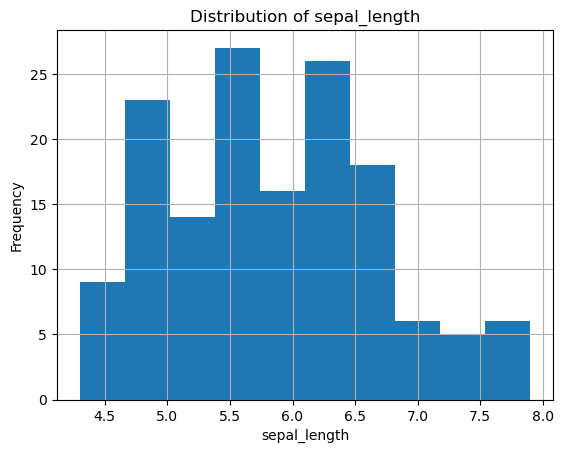

In [7]:
cols = ['sepal_length']
for column in cols:
    plt.figure()
    ir[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

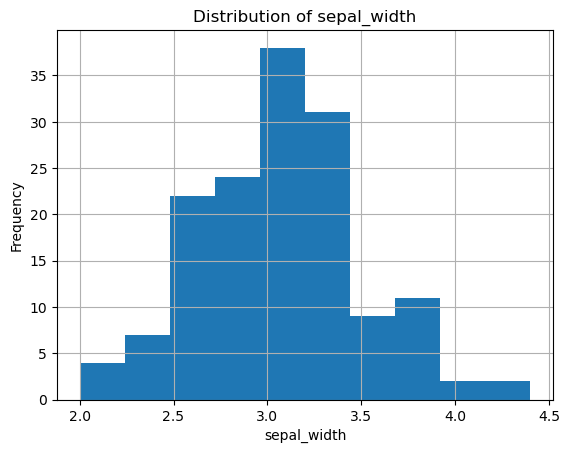

In [8]:
cols = ['sepal_width']
for column in cols:
    plt.figure()
    ir[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show() 

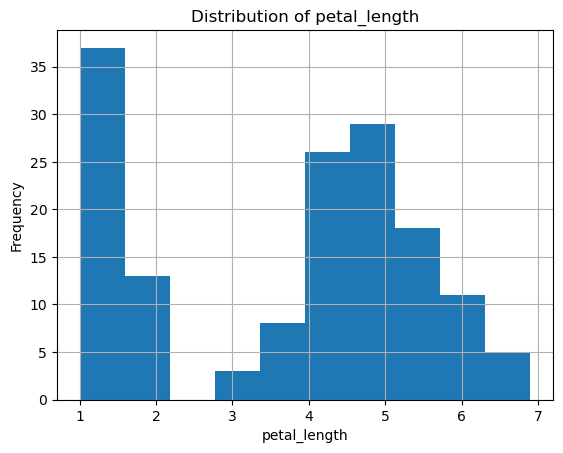

In [9]:
cols = ['petal_length']
for column in cols:
    plt.figure()
    ir[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

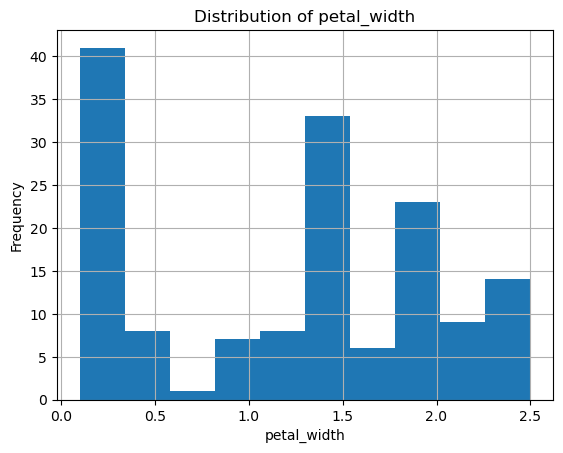

In [10]:
cols = ['petal_width']
for column in cols:
    plt.figure()
    ir[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
feature_combinations = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_width', 'petal_width')
]


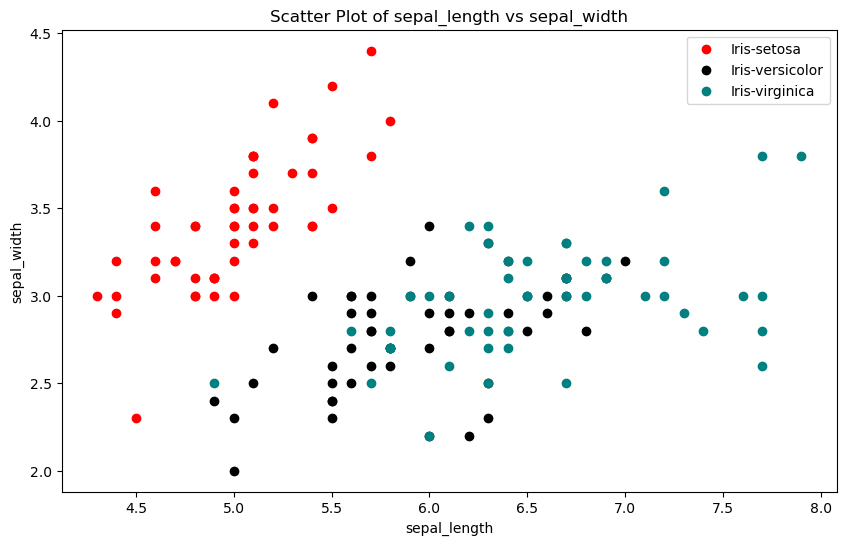

In [15]:
color_palette = {'Iris-setosa': 'red', 'Iris-versicolor': 'black', 'Iris-virginica': 'teal'}

# Scatter plot for 'sepal_length' vs 'sepal_width'
plt.figure(figsize=(10, 6))
for species in ir['species'].unique():
    subset = ir[ir['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], color=color_palette[species], label=species)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter Plot of sepal_length vs sepal_width')
plt.legend()
plt.show()

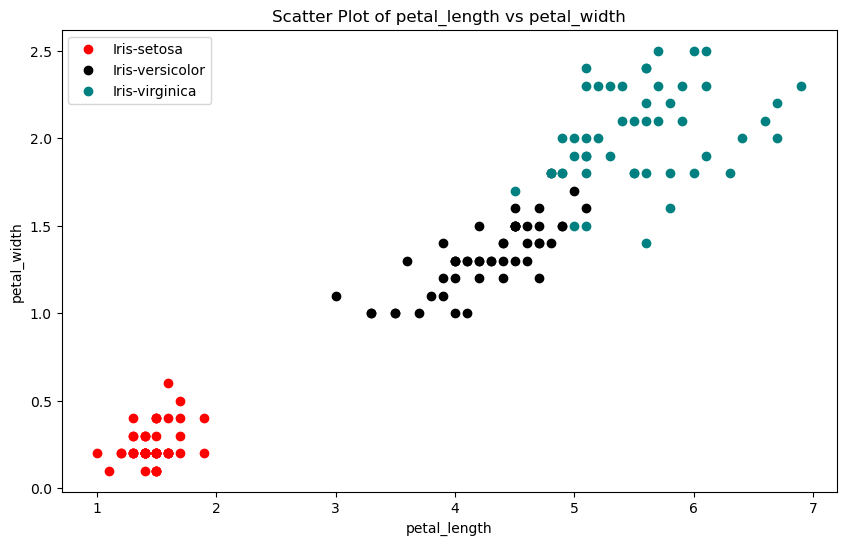

In [17]:
plt.figure(figsize=(10, 6))
for species in ir['species'].unique():
    subset = ir[ir['species'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], color=color_palette[species], label=species)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot of petal_length vs petal_width')
plt.legend()
plt.show()

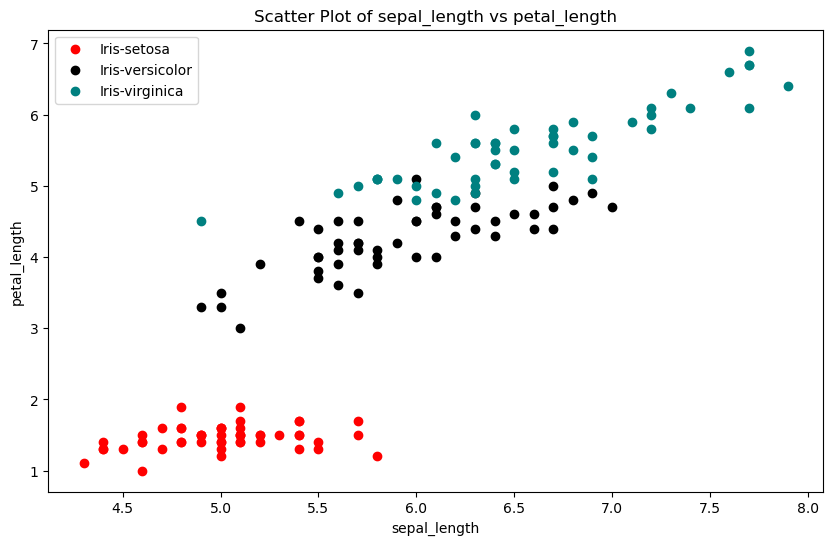

In [18]:
plt.figure(figsize=(10, 6))
for species in ir['species'].unique():
    subset = ir[ir['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], color=color_palette[species], label=species)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Scatter Plot of sepal_length vs petal_length')
plt.legend()
plt.show()

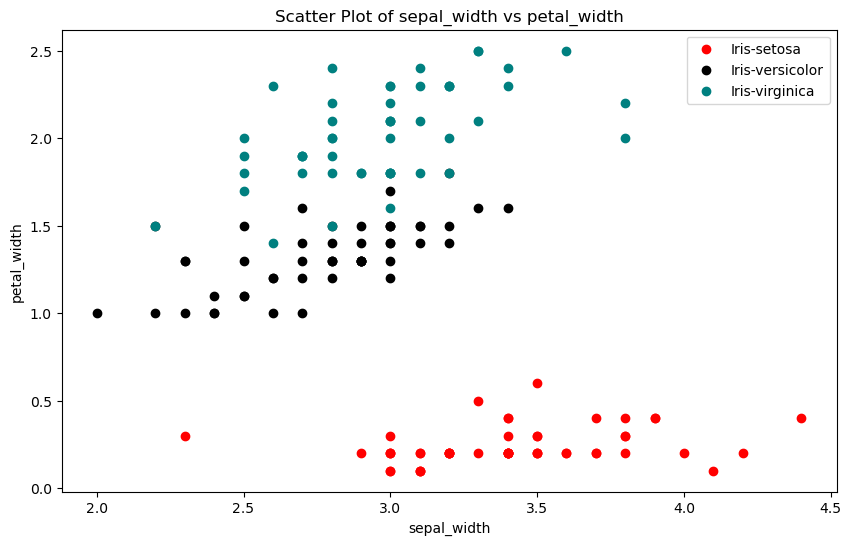

In [19]:
plt.figure(figsize=(10, 6))
for species in ir['species'].unique():
    subset = ir[ir['species'] == species]
    plt.scatter(subset['sepal_width'], subset['petal_width'], color=color_palette[species], label=species)
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Scatter Plot of sepal_width vs petal_width')
plt.legend()
plt.show()

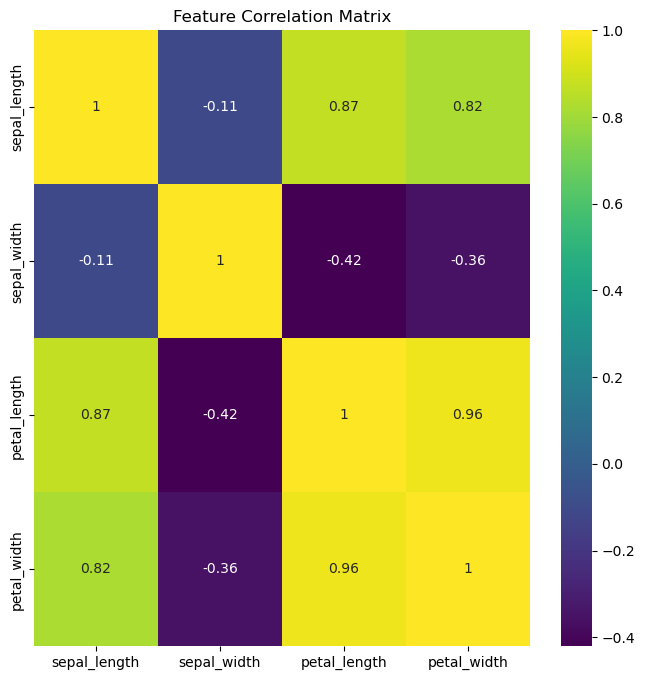

In [20]:
features = ir.drop(columns='species')
correlation_matrix = features.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Feature Correlation Matrix')
plt.show()

In [21]:
label_encoder = LabelEncoder()
ir['species'] = label_encoder.fit_transform(ir['species'])

In [22]:
X_data = ir.drop(columns='species')
y_data = ir['species']

In [23]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)


In [24]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_scaled, y_data, test_size=0.3, random_state=42)

In [25]:
classifiers = {
    "Logistic Regression Model": LogisticRegression(max_iter=200),
    "K-Nearest Neighbor Model": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Model": DecisionTreeClassifier(max_depth=3)
}

In [26]:
for name, clf in classifiers.items():
    clf.fit(X_train_set, y_train_set)
    predictions = clf.predict(X_test_set)
    acc = accuracy_score(y_test_set, predictions) * 100
    print(f"\nAccuracy with {name}: {acc:.2f}%")


Accuracy with Logistic Regression Model: 91.11%

Accuracy with K-Nearest Neighbor Model: 100.00%

Accuracy with Decision Tree Model: 100.00%
